In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import unicode_literals

figsize(8, 6)

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
    
rcParams['xtick.labelsize'] = 20
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.major.pad'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1

rcParams['ytick.labelsize'] = 20
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.major.pad'] = 10
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1

rcParams['legend.fontsize'] = 24
rcParams['legend.borderaxespad'] = 1

rcParams['axes.labelsize'] = 24
rcParams['axes.titlesize'] = 24

In [3]:
banks = ['A', 'B', 'C', 'D']

In [4]:
calib04 = np.load('/home/mabitbol/GBT-S140/calibrations/calibration_3C295_04_all.npy').item()
calib05 = np.load('/home/mabitbol/GBT-S140/calibrations/calibration_3C295_05_all.npy').item()

In [5]:
calib04.keys()

['freqs', 'pdiode1', 'pdiode2', 'pdiode']

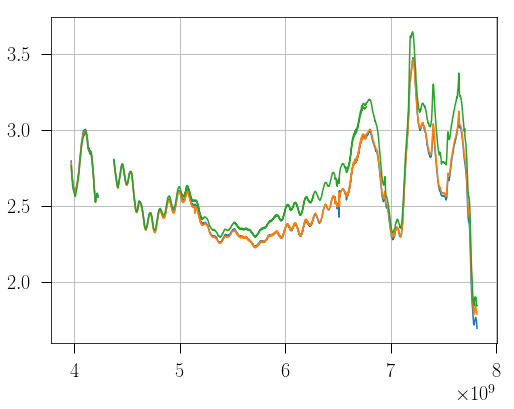

In [6]:
plot(calib04['freqs'], calib04['pdiode'])
plot(calib04['freqs'], calib04['pdiode1'])
plot(calib04['freqs'], calib04['pdiode2'])
grid()

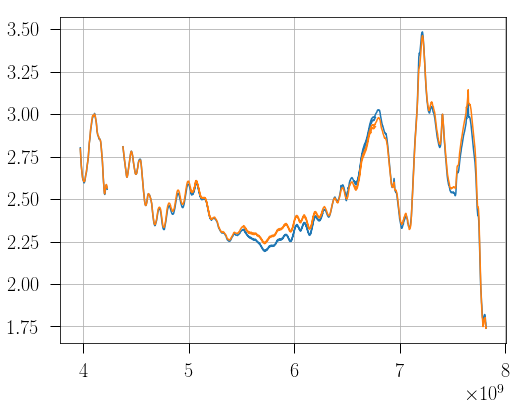

In [7]:
plot(calib05['freqs'], calib05['pdiode'])
plot(calib05['freqs'], calib05['pdiode1'])
grid()

In [8]:
ghz = 1.e-9

In [9]:
df = 0.75
df2 = 0.3
freqs = [4.575, 5.625, 6.125, 7.175]

In [10]:
fs = calib05['freqs']

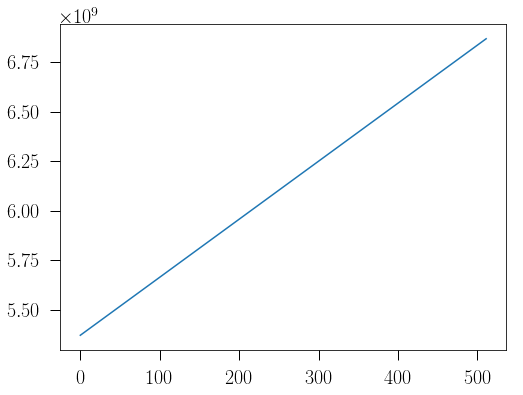

In [31]:
plot(fs[1024:512*3])

In [26]:
bankAcalib0 = calib05['pdiode'][:512]
bankAcalib1 = calib05['pdiode1'][:512]

In [30]:
bankBcalib0 = calib05['pdiode'][512:1024]
bankBcalib1 = calib05['pdiode1'][512:1024]

In [32]:
bankCcalib0 = calib05['pdiode'][1024:512*3]
bankCcalib1 = calib05['pdiode1'][1024:512*3]

In [35]:
calibAC0 = calib05['pdiode'][:512*3]
calibAC1 = calib05['pdiode1'][:512*3]

In [44]:
np.sqrt(np.nanmean( (calibAC0 - calibAC1)**2))

0.03193377701344334

In [45]:
np.sqrt(np.nanmean( (calibAC0 - calibAC1)**2)) / np.nanmean(calibAC0) * 100

1.3098688113583277

In [46]:
np.sqrt(np.nanmean( (calibAC0 - calibAC1)**2)) / np.nanmean(calibAC1) * 100

1.2998890455679468

In [39]:
np.nanmean( (calibAC0 - calibAC1)**2 / calibAC1) * 100

-0.81394270897335863

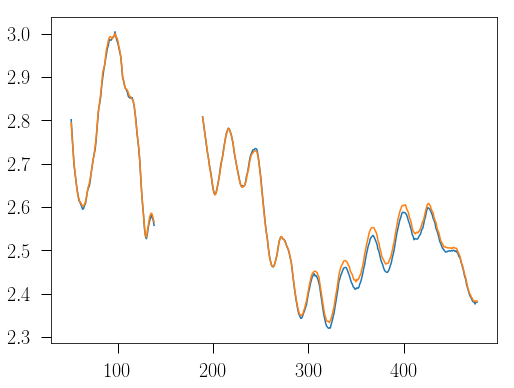

In [34]:
plot(bankAcalib0)
plot(bankAcalib1)

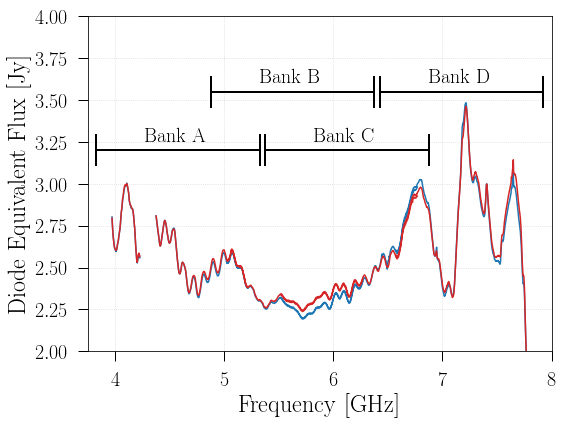

In [15]:
#plot(fs*ghz, calib04['pdiode'], 'C3', label='Session 4')
#plot(fs*ghz, calib04['pdiode1'], 'C3')
plot(fs*ghz, calib05['pdiode'], 'C0', label='Session 5')
plot(fs*ghz, calib05['pdiode1'], 'C3')

ylabel('$\mathrm{Diode\ Equivalent\ Flux\ [Jy]}$')
xlabel('$\mathrm{Frequency\ [GHz]}$')
grid(ls='dotted', alpha=0.5)

errorbar(freqs[0], 3.2, xerr=df, capsize=16, capthick=2, elinewidth=2, ecolor='k')
errorbar(freqs[1], 3.55, xerr=df, capsize=16, capthick=2, elinewidth=2, ecolor='k')
errorbar(freqs[2], 3.2, xerr=df, capsize=16, capthick=2, elinewidth=2, ecolor='k')
errorbar(freqs[3], 3.55, xerr=df, capsize=16, capthick=2, elinewidth=2, ecolor='k')

text(freqs[0]-df2, 3.25, '$\mathrm{Bank\ A}$', fontsize=20)
text(freqs[1]-df2, 3.6, '$\mathrm{Bank\ B}$', fontsize=20)
text(freqs[2]-df2, 3.25, '$\mathrm{Bank\ C}$', fontsize=20)
text(freqs[3]-df2, 3.6, '$\mathrm{Bank\ D}$', fontsize=20)

ylim(2, 4)
xlim(3.75, 8)
tight_layout()
savefig('calibrations_paperplot.pdf', fmt='pdf')